In [2]:
import numpy as np
import matplotlib.pyplot as plt

# See http://www.willamette.edu/~gorr/classes/GeneralGraphics/Transforms/transforms2d.htm

In [2]:
pad = lambda x: np.hstack([x, np.ones((x.shape[0], 1))])
unpad = lambda x: x[:,:-1]

def tmat(rot=0,tx=0,ty=0):
    T = np.identity(3)
    T[0,0] = np.cos(np.deg2rad(rot))
    T[1,1] = np.cos(np.deg2rad(rot))
    T[0,1] = -np.sin(np.deg2rad(rot))
    T[1,0] = np.sin(np.deg2rad(rot))
    T[2,0] = tx
    T[2,1] = ty
    return T

In [5]:
coords = np.array([[0,1],[0,2],[0,3]])

(-6, 6)

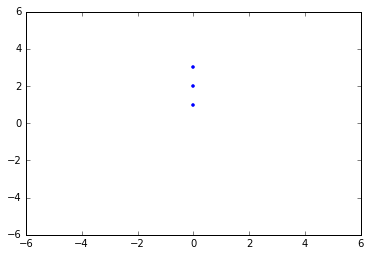

In [13]:
plt.plot(coords[:,0],coords[:,1],'.')
plt.xlim([-6,6]);plt.ylim([-6,6])

# A quick plot of our coordinates.

In [10]:
T0 = tmat(0,0,1)     # A translation, moving the points vertically by one
T1 = tmat(90,0,0)    # A rotation, rotating the dots clockwise by 90 degrees
T2 = tmat(90,0,1)    # A combination of the two.  But in which order?

# Definition of some new transformations

(-6, 6)

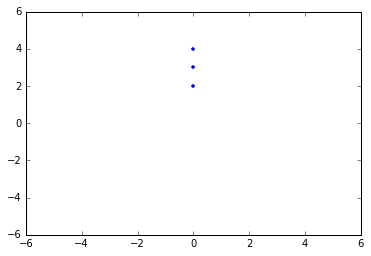

In [14]:
plt.plot(*unpad(np.dot(pad(coords),T0)).T,'.')
plt.xlim([-6,6]);plt.ylim([-6,6])

# Matrix algebra using the dot function.  The original coordinates are padded with ones
# and then multiplied by the transformation matrix.  The dots are shifted upward by one.

(-6, 6)

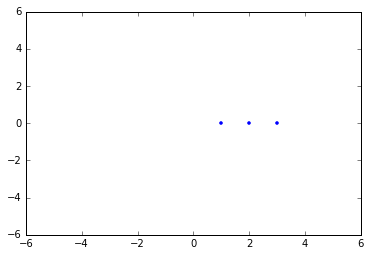

In [15]:
plt.plot(*unpad(np.dot(pad(coords),T1)).T,'.')
plt.xlim([-6,6]);plt.ylim([-6,6])

# Same idea, but the transform is a 90 degree rotation about the origin.

(-6, 6)

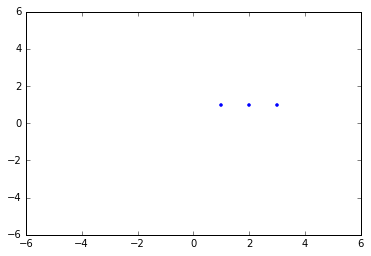

In [16]:
plt.plot(*unpad(np.dot(pad(coords),T2)).T,'.')
plt.xlim([-6,6]);plt.ylim([-6,6])

# Here the transformation contains both a rotation and a translation, but in which order?
# Answer: The rotation is applied first, then the transform.  

(-6, 6)

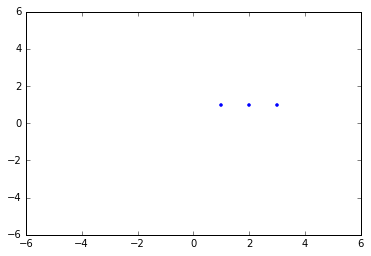

In [19]:
plt.plot(*unpad(np.dot(pad(coords),np.dot(T1,T0))).T,'.')
plt.xlim([-6,6]);plt.ylim([-6,6])

# Here, the same thing is done using a matrix multiplication of the two individual transforms.
# Note the order!  The rotation (T1) is first, then the translation.

(-6, 6)

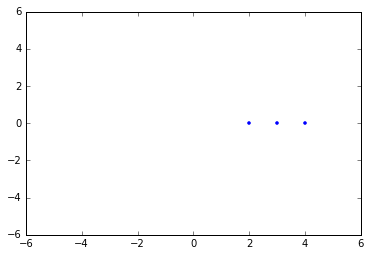

In [20]:
plt.plot(*unpad(np.dot(pad(coords),np.dot(T0,T1))).T,'.')
plt.xlim([-6,6]);plt.ylim([-6,6])

# Here, the translation is done first, then the rotation.  Note that
# the dots are in line with y=0, indicating that the rotation was
# second.

# Perspective transforms with OpenCV

Affine, Perspective, and Homogenous Transform References:

Main:

https://stackoverflow.com/questions/44578876/opencv-homography-to-find-global-xy-coordinates-from-pixel-xy-coordinates#comment89939363_51143364

Secondary:

https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/
https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#Mat%20getPerspectiveTransform(InputArray%20src,%20InputArray%20dst)
https://www.scilab.org/tutorials/computer-vision-%E2%80%93-perspective
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#exercises


Background:

https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/warp_affine/warp_affine.html
https://stackoverflow.com/questions/45637472/opencv-transformationmatrix-affine-vs-perspective-warping
https://www.programcreek.com/python/example/85017/cv2.getPerspectiveTransform

Mine:

https://github.com/thomaspingel/geography_single_shot_notebooks/blob/master/2D%20Rigid%20Rotations%2C%20Translations%2C%20and%20Matrix%20Multiplication.ipynb
https://github.com/thomaspingel/map_labeler/blob/master/map_labeler.py

Bonus:

https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html

In [6]:
import cv2
from numpy.linalg import inv

In [3]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

In [9]:
M = cv2.getPerspectiveTransform(pts1,pts2)
I = inv(M)

# from pts1 to pts2
H = np.squeeze(cv2.convertPointsToHomogeneous(pts1))
q = np.dot(M,H.T).T
t = np.squeeze(cv2.convertPointsFromHomogeneous(q))
print(t)

[[-1.36167689e-14 -1.36167689e-14]
 [ 3.00000000e+02  5.19530731e-14]
 [ 0.00000000e+00  3.00000000e+02]
 [ 3.00000000e+02  3.00000000e+02]]


In [12]:
# from pts2 to pts1
H = np.squeeze(cv2.convertPointsToHomogeneous(pts2))
q = np.dot(I,H.T).T
t = np.squeeze(cv2.convertPointsFromHomogeneous(q))
print(t)

[[ 56.  65.]
 [368.  52.]
 [ 28. 387.]
 [389. 390.]]
